In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing the libraries

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

## Preparing Data

In [102]:
# read data
data = pd.read_excel(r'/content/drive/MyDrive/TA (1)/Processing Data/Data/raw data/data_after_cleansing.xlsx',sheet_name="Belawan")
data

,Date,Hours,Hs [m],Angin [m/s]
0,1999-07-10 15:00:00,1,0.750,2.726197
1,1999-07-10 16:00:00,2,0.750,2.608670
2,1999-07-10 17:00:00,3,0.750,3.021065
3,1999-07-10 18:00:00,4,0.688,3.464277
4,1999-07-10 19:00:00,5,0.688,3.940771
...,...,...,...,...
437,1999-07-28 20:00:00,438,0.656,2.244146
438,1999-07-28 21:00:00,439,0.500,1.601026
439,1999-07-28 22:00:00,440,0.500,1.483258
440,1999-07-28 23:00:00,441,0.500,1.312014


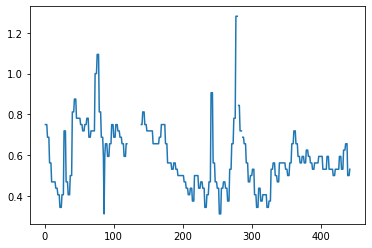

In [103]:
# plotting raw data
plt.plot(data['Hours'],data['Hs [m]'])
plt.show()

In [104]:
import copy
data_raw = copy.deepcopy(data)

In [105]:
count_nan = data_raw['Hs [m]'].isna().sum()
print("Jumlah Data : ", len(data_raw))
print("Jumlah NaN Data : ", count_nan)

Jumlah Data :  442
Jumlah NaN Data :  22


### Interpolation

In [106]:
# import library
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

In [107]:
# define other dataframe for interpolate 
data2 = copy.deepcopy(data)
data3 = copy.deepcopy(data)
data4 = copy.deepcopy(data)

In [108]:
# drop NaN value in dataframe data
data = data.dropna()

In [109]:
# cubic interpolation
y_fc=interp1d(data['Hours'],data['Hs [m]'], kind='cubic')

In [110]:
# quadratic interpolation
y_fq=interp1d(data['Hours'],data['Hs [m]'], kind='quadratic')

In [111]:
# linear interpolation
y_fl=interp1d(data['Hours'],data['Hs [m]'], kind='linear')

In [112]:
# interpolate using function we define before
import math

for i in data2['Hours'] :
  if math.isnan(data2['Hs [m]'][i-1])== True:
    data2['Hs [m]'][i-1] = y_fc(i)
    data3['Hs [m]'][i-1] = y_fq(i)
    data4['Hs [m]'][i-1] = y_fl(i)
  else:
    pass
#data.loc[data['Hs [m]'].isna()]

<ipython-input-112-86623d2f7eed>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-112-86623d2f7eed>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-112-86623d2f7eed>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



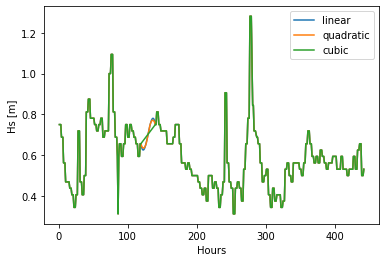

In [113]:
# plot after interpolation
plt.plot(data2['Hours'],data2['Hs [m]'], label ='linear')
plt.plot(data3['Hours'],data3['Hs [m]'], label ='quadratic')
plt.plot(data4['Hours'],data4['Hs [m]'], label ='cubic')
#plotting scatter point of data
plt.xlabel('Hours')
plt.ylabel('Hs [m]')
plt.legend()
plt.show()

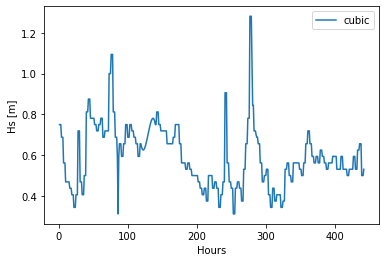

In [114]:
# plot after interpolation
plt.plot(data2['Hours'],data2['Hs [m]'], label ='cubic')
#plotting scatter point of data
plt.xlabel('Hours')
plt.ylabel('Hs [m]')
plt.legend()
plt.show()

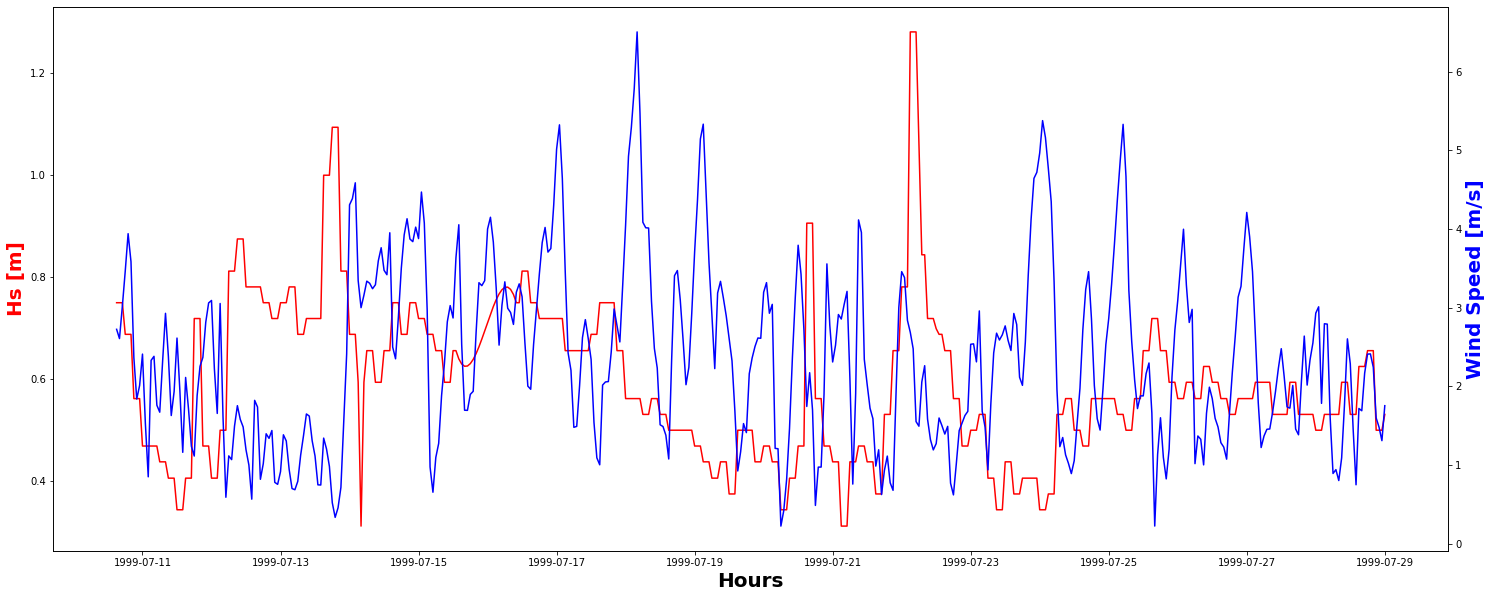

In [115]:
# plotting wind and wave
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(25, 10))
# make a plot
ax.plot(data2['Date'],
        data2['Hs [m]'],
        color="red", 
        )
# set x-axis label
ax.set_xlabel("Hours",fontsize=20,fontweight='bold')
# set y-axis label
ax.set_ylabel("Hs [m]",
              color="red",
              fontsize=20,fontweight='bold')

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data2['Date'],
        data2['Angin [m/s]'],color="blue")
ax2.set_ylabel("Wind Speed [m/s]",color="blue",fontsize=20,fontweight='bold')
plt.show()

In [116]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data2['Angin [m/s]'],data2['Hs [m]'])
corr

-0.14223540348911753

karena data tidak berdistribusi normal -> ada skew nya (positif) makanya buat scaling data pake -> Normalize Data

## Linear Regression 1 Variable

In [117]:
X = data2.iloc[:, 1].values
Y = data2.iloc[:, 2].values
X = X.reshape(-1,1)

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [119]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=data2['Date'], y=model.predict(X),
                    mode='lines',
                    name='Linear Regression'))
fig.add_trace(go.Scatter(x=data2['Date'], y=Y,
                    mode='markers',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>',
                  height=600, width=1200)


In [120]:
y_pred = model.predict(X)
y_pred

array([0.66848585, 0.66814465, 0.66780346, 0.66746226, 0.66712106,
       0.66677986, 0.66643866, 0.66609746, 0.66575626, 0.66541506,
       0.66507387, 0.66473267, 0.66439147, 0.66405027, 0.66370907,
       0.66336787, 0.66302667, 0.66268547, 0.66234428, 0.66200308,
       0.66166188, 0.66132068, 0.66097948, 0.66063828, 0.66029708,
       0.65995588, 0.65961468, 0.65927349, 0.65893229, 0.65859109,
       0.65824989, 0.65790869, 0.65756749, 0.65722629, 0.65688509,
       0.6565439 , 0.6562027 , 0.6558615 , 0.6555203 , 0.6551791 ,
       0.6548379 , 0.6544967 , 0.6541555 , 0.65381431, 0.65347311,
       0.65313191, 0.65279071, 0.65244951, 0.65210831, 0.65176711,
       0.65142591, 0.65108472, 0.65074352, 0.65040232, 0.65006112,
       0.64971992, 0.64937872, 0.64903752, 0.64869632, 0.64835512,
       0.64801393, 0.64767273, 0.64733153, 0.64699033, 0.64664913,
       0.64630793, 0.64596673, 0.64562553, 0.64528434, 0.64494314,
       0.64460194, 0.64426074, 0.64391954, 0.64357834, 0.64323

In [121]:
from sklearn.metrics import r2_score
r2_score(Y, y_pred)

0.08164370910388152

## Linear Regression 2 Variable

In [122]:
X2 = data2.iloc[:, [1,3]].values
Y2 = data2.iloc[:, 2].values

In [123]:
model = LinearRegression()
model.fit(X2,Y2)

LinearRegression()

In [124]:
y_pred2 = model.predict(X2)

In [125]:
r2_score(Y2,y_pred2)

0.10521153263768979

In [126]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=data2['Date'], y=model.predict(X2),
                    mode='markers',
                    name='Multiple Linear Regression'))
fig.add_trace(go.Scatter(x=data2['Date'], y=Y2,
                    mode='markers',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>',
                  height=600, width=1200)


### verif


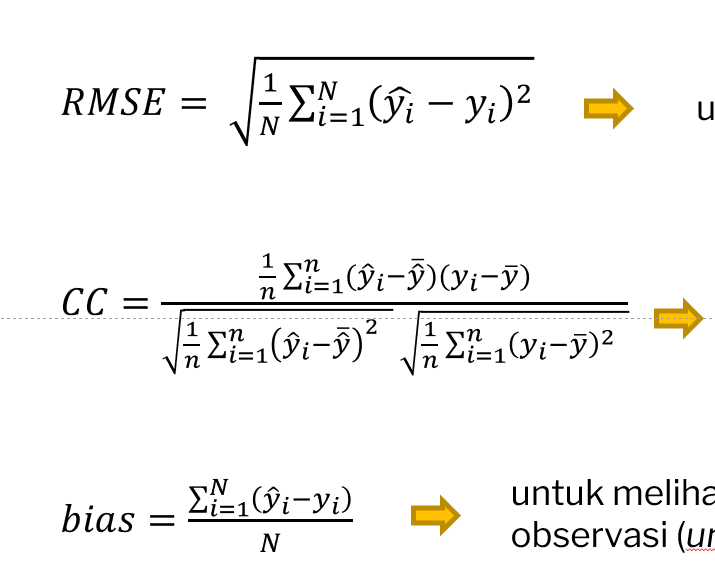

In [127]:
# bias 
gap_sum = 0
for j in range(len(Y2)):
  gap = y_pred2[j] - Y2[j]
  gap_sum += gap

bias = gap_sum/len(Y2)
bias

-5.2748152753683906e-18

In [128]:
# bias 
gap_sum = 0
for j in range(len(Y)):
  gap = y_pred[j] - Y[j]
  gap_sum += gap

bias = gap_sum/len(Y)
bias

2.7127621416180295e-17

In [129]:
# coefficiect correlation 
mean_pred = y_pred2.mean()
mean_obv = Y2.mean()
atas = 0
a_sum = 0
b_sum = 0
for i in range(len(Y2)):
  a = y_pred2[i] - mean_pred
  b = Y2[i] - mean_obv
  c = a*b
  atas +=c
  a_sqr = a**2
  b_sqr = b**2
  a_sum += a_sqr
  b_sum += b_sqr

konst = 1/len(Y2)
cc = konst* atas / ((konst*a_sum)**0.5) * ((konst*b_sum)**0.5)
cc

0.007529826581037296

In [130]:
from scipy.stats import pearsonr
corr, _ = pearsonr(Y2,y_pred2)
corr

0.3243632726399366

In [131]:
from scipy.stats import pearsonr
corr, _ = pearsonr(Y,y_pred)
corr

0.2857336331338704

In [132]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(Y,y_pred)
RMSE = math.sqrt(MSE)
RMSE

0.1460098829954446

In [133]:
MSE = mean_squared_error(Y2,y_pred2)
RMSE = math.sqrt(MSE)
RMSE

0.14412417664593402